In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [2]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [3]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

# Aula 24 - SVD e PCA

WIP

In [4]:
import networkx as nx

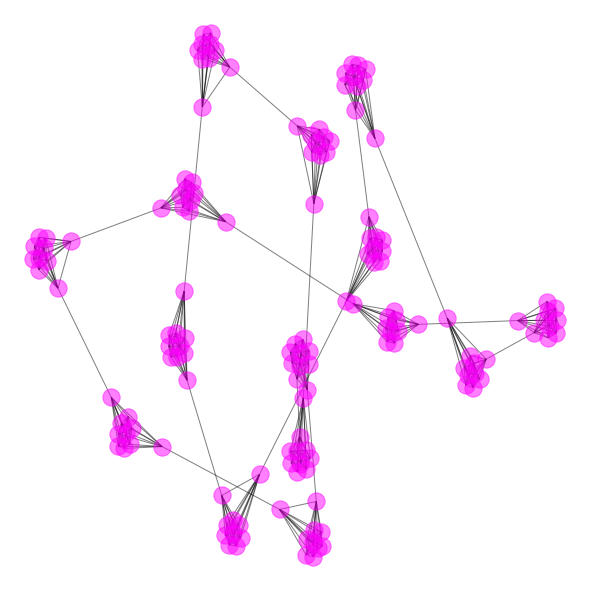

In [5]:
plt.figure(figsize=(8, 8))
G = nx.generators.community.ring_of_cliques(15, 10)
nx.draw_spring(G, node_color='magenta', alpha=0.5)

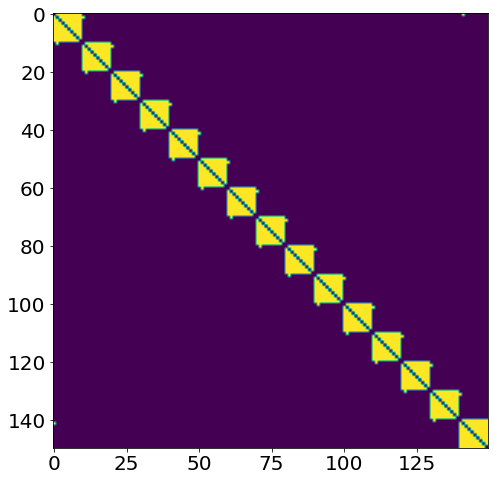

In [6]:
A = nx.adjacency_matrix(G).toarray()
plt.imshow(A)

In [7]:
U, s, Vh = np.linalg.svd(A)
S = np.diag(s)

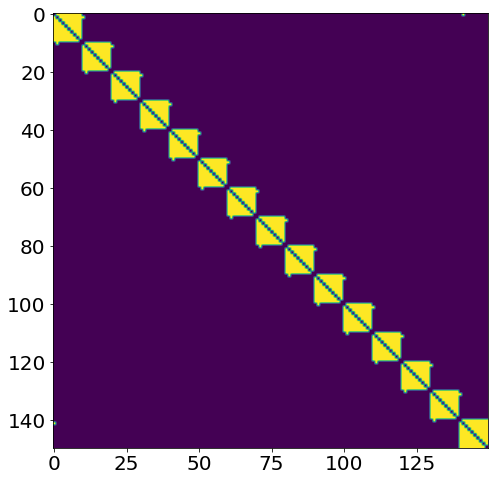

In [8]:
R = U.dot(S).dot(Vh)
plt.imshow(R)

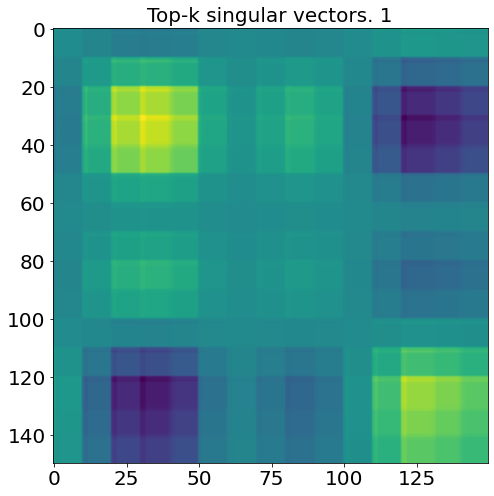

In [9]:
from sklearn.decomposition import TruncatedSVD

model = TruncatedSVD(n_components=1)
plt.title('Top-k singular vectors. {}'.format(1))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R)

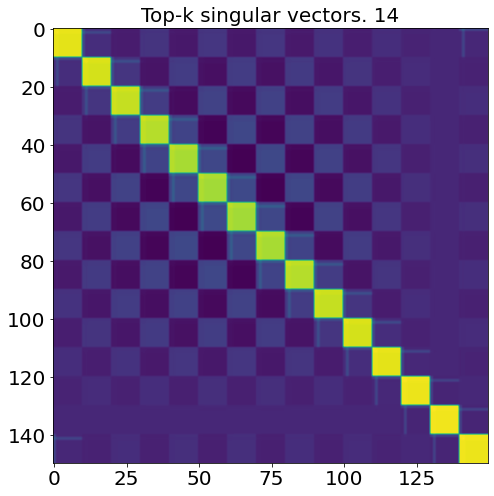

In [10]:
model = TruncatedSVD(n_components=14)
plt.title('Top-k singular vectors. {}'.format(14))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R)

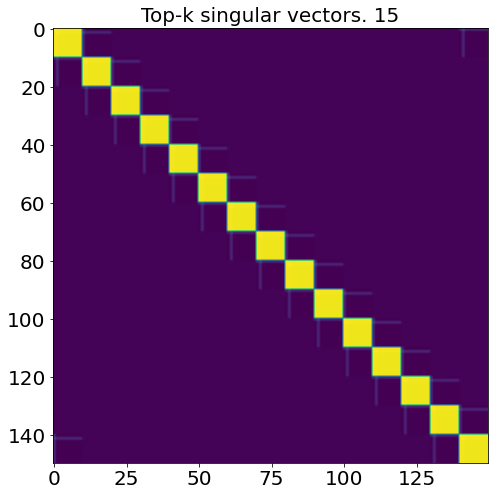

In [11]:
model = TruncatedSVD(n_components=15)
plt.title('Top-k singular vectors. {}'.format(15))
T = model.fit_transform(A)
R = model.inverse_transform(T)
plt.imshow(R)

In [12]:
from IPython.display import HTML
from matplotlib import animation

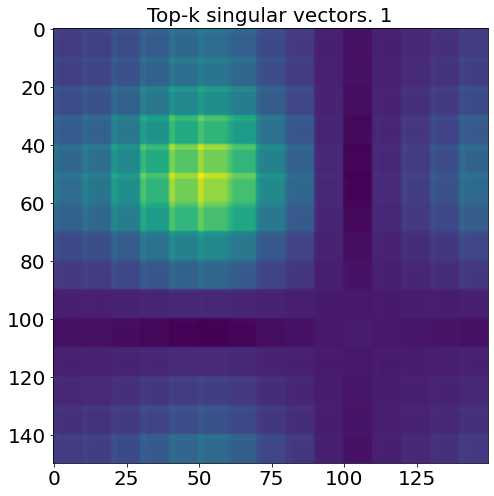

In [13]:
def plot(k):
    plt.cla()
    model = TruncatedSVD(n_components=k+1)
    plt.title('Top-k singular vectors. {}'.format(k+1))
    T = model.fit_transform(A)
    R = model.inverse_transform(T)
    plt.imshow(R)
    
fig = plt.figure()
ani = animation.FuncAnimation(fig, plot, len(A)-1)
HTML(ani.to_html5_video())

In [14]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/24-Decomposicao/fixed_comments.csv', sep='\t')
del df['Unnamed: 0']
df.head()

,id,created_time,media_code,owner_username,mentioned_usernames,tags
0,17842640887345362,1547342805,Bsjbn9igpY1,alitawiiiiil,[''],['']
1,17842690399347336,1547406553,Bsk53uml3PU,tommypazz,['thegirlwiththeironfists'],['']
2,17842728391347487,1547379803,Bsknsm4HUzX,dudhyanth85,[''],['']
3,17842732198347154,1547387905,Bskx3OuHrR_,scilliaanna,[''],['']
4,17842740721347584,1547392787,Bsk8XtWAf4H,davipinna,[''],['']


In [15]:
from collections import defaultdict

users = {}
tags = {}
mentions = defaultdict(int)

pop_tags = defaultdict(int)
pop_users = defaultdict(int)

for user, tags_str in df[['owner_username', 'tags']].values:
    for tag in tags_str[1:-1].replace("'", "").strip().split(','):
        if tag.strip():
            for cleaned in tag.split('#'):
                cleaned = cleaned.strip()
                if user not in users:
                    users[user] = len(users)
                if cleaned not in tags:
                    tags[cleaned] = len(tags)
                mentions[user, cleaned] += 1
                pop_tags[cleaned] += 1
                pop_users[user] += 1
                
inverse_users = dict((v, k) for k, v in users.items())
inverse_tags = dict((v, k) for k, v in tags.items())

In [16]:
from scipy import sparse as sp

X = sp.lil_matrix((len(users), len(tags)))
for user, tag in mentions:
    X[users[user], tags[tag]] = np.log10(mentions[user, tag] + 1)
X = X.tocsr()

In [17]:
def print_top_words(model, feature_names):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-10 - 1:-1]])
        print(message)
    print()

In [18]:
model = TruncatedSVD(n_components=20)
model.fit_transform(X)
print_top_words(model, inverse_tags)

Topic #0: fashion style photooftheday love instagood ootd picoftheday outfit beautiful outfitoftheday
Topic #1: ootd outfitoftheday fashionista lookoftheday lookbook fashion fashiongram outfit ootdshare whatiwore
Topic #2: foodporn napolifoodporn napoli italyfoodporn food puokemed pizza instafood foodblogger foodie
Topic #3: igersitalia ig_italia italia whatitalyis italy italian_places italiainunoscatto instaitalia ilikeitaly roma
Topic #4: valespo valespotour velespo catania napoli valessi valerio angel sespo valespi
Topic #5: likeforlike follow4follow follow igers f4f like4like likeforfollow whatiworetoday likeforlikes whatiwore
Topic #6: fitness love fit workout motivation gym whatiwore bodybuilding whatiworetoday ootdshare
Topic #7: instagood picoftheday instamood instafashion instadaily pretty fashionista bestoftheday instacool igdaily
Topic #8: love milano italy napoli amore roma milan naples frasi inspiration
Topic #9: frasi leggere libri aforismi citazioni amore parole poetry p

## PCA

In [19]:
from sklearn.decomposition import PCA

In [20]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/24-Decomposicao/capes-cacc.csv', index_col=3).fillna(0)
del df['Programa']
del df['Instituição']
nivel = df['Nível']
del df['Nível']
df = pd.get_dummies(df, columns=['Tem doutorado'], drop_first=False)
df.head()

,Docentes colaboradores,Docentes permanentes,Docentes visitantes,Resumos em conf,Resumos expandidos em conf,Artigos em conf,Dissertacoes,Teses,periodicos_A1,periodicos_A2,...,per_comaluno_A2,per_comaluno_B1,per_comaluno_B2,per_comaluno_B3,per_comaluno_B4,per_comaluno_B5,per_comaluno_C,per_comaluno_NA,Tem doutorado_Não,Tem doutorado_Sim
Sigla,,,,,,,,,,,,,,,,,,,,,
UFAM,0.25,24.75,0.0,20,25,390,108.0,14.0,15,19,...,5.0,4.0,0.0,2.0,0.0,5.0,6.0,6.0,0,1
UFPA,5.50,14.00,0.0,23,24,284,77.0,0.0,19,21,...,5.0,2.0,1.0,2.0,0.0,0.0,5.0,14.0,0,1
UFMA,3.00,10.00,0.0,15,7,115,50.0,0.0,5,11,...,5.0,5.0,1.0,0.0,0.0,4.0,3.0,2.0,1,0
UEMA,6.25,14.00,0.0,5,10,73,25.0,0.0,1,1,...,0.0,2.0,0.0,1.0,0.0,0.0,1.0,2.0,1,0
FUFPI,1.75,9.50,0.0,4,1,150,31.0,0.0,7,4,...,2.0,2.0,0.0,0.0,2.0,8.0,2.0,9.0,1,0


In [21]:
Z = (df - df.mean()) / df.std(ddof=1)
Z

,Docentes colaboradores,Docentes permanentes,Docentes visitantes,Resumos em conf,Resumos expandidos em conf,Artigos em conf,Dissertacoes,Teses,periodicos_A1,periodicos_A2,...,per_comaluno_A2,per_comaluno_B1,per_comaluno_B2,per_comaluno_B3,per_comaluno_B4,per_comaluno_B5,per_comaluno_C,per_comaluno_NA,Tem doutorado_Não,Tem doutorado_Sim
Sigla,,,,,,,,,,,,,,,,,,,,,
UFAM,-0.942673,0.366255,-0.290455,-0.171810,-0.255158,0.818448,0.538385,-0.018267,-0.227736,0.066281,...,-0.117974,-0.279284,-0.564571,-0.262590,-0.584528,0.318601,0.215795,-0.133150,-1.090781,1.090781
UFPA,0.380598,-0.503534,-0.290455,-0.060084,-0.285247,0.241514,0.050755,-0.474934,-0.088021,0.158338,...,-0.117974,-0.478772,0.015468,-0.262590,-0.584528,-0.830200,0.015985,1.115132,-1.090781,1.090781
UFMA,-0.249531,-0.827176,-0.290455,-0.358020,-0.796766,-0.678314,-0.373954,-0.474934,-0.577024,-0.301946,...,-0.117974,-0.179540,0.015468,-0.630706,-0.584528,0.088841,-0.383635,-0.757291,0.904550,-0.904550
UEMA,0.569636,-0.503534,-0.290455,-0.730440,-0.706498,-0.906911,-0.767204,-0.474934,-0.716739,-0.762231,...,-0.569406,-0.478772,-0.564571,-0.446648,-0.584528,-0.830200,-0.783255,-0.757291,0.904550,-0.904550
FUFPI,-0.564595,-0.867632,-0.290455,-0.767682,-0.977302,-0.487817,-0.672824,-0.474934,-0.507166,-0.624145,...,-0.388833,-0.478772,-0.564571,-0.630706,0.668032,1.007882,-0.583445,0.334956,0.904550,-0.904550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UFMS/UFG,-1.005685,-0.726038,3.340236,-0.618714,-0.525962,-0.422504,-1.160454,-0.018267,-0.262665,0.066281,...,-0.569406,-0.578517,-0.564571,-0.630706,-0.584528,-0.140920,-0.983065,-0.757291,-1.090781,1.090781
UFMS/CA/Prof,0.758675,-0.503534,-0.290455,-0.395262,-0.525962,-0.912353,-0.955964,-0.474934,-0.716739,-0.762231,...,-0.569406,-0.678261,-0.564571,-0.630706,-0.584528,-0.830200,-0.983065,-1.069362,0.904550,-0.904550
UFG,-0.060492,0.871947,1.524890,-0.209052,-0.315336,-0.008854,0.444005,-0.474934,-0.437308,-0.071804,...,-0.027688,-0.179540,0.595507,0.105527,1.294311,-0.140920,0.815225,-0.133150,0.904550,-0.904550


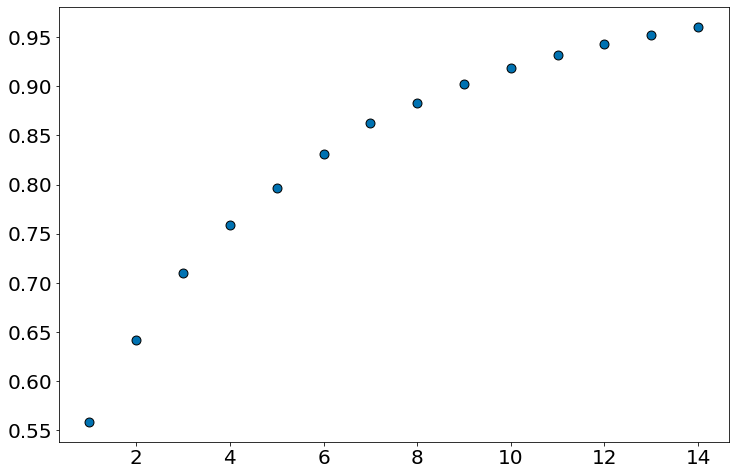

In [22]:
components = list(range(1, 15))
y = []
for k in components:
    pca = PCA(n_components=k)
    pca = pca.fit(Z)
    y.append(pca.explained_variance_ratio_.sum())
plt.scatter(components, y, s=80, edgecolors='k')

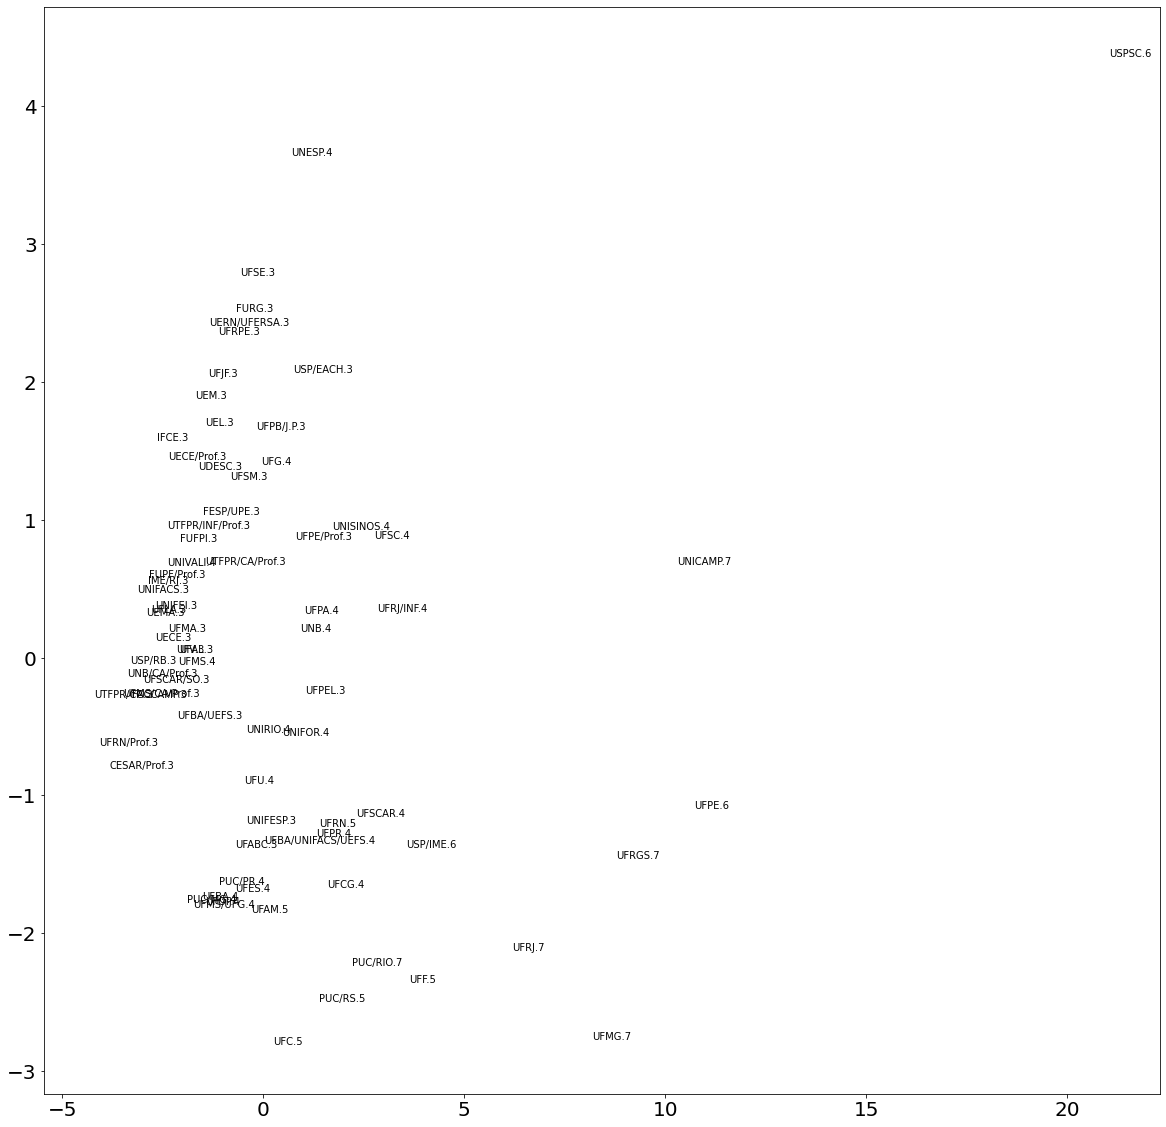

In [23]:
plt.figure(figsize=(20, 20))

pca = PCA(n_components=2)
pca = pca.fit(Z)
N = pca.transform(Z)
plt.scatter(N[:, 0], N[:, 1], s=0, edgecolors='k')
ax = plt.gca()
for i, txt in enumerate(df.index):
    ax.annotate('{}.{}'.format(txt, nivel[i]), (N[:, 0][i], N[:, 1][i]))